# Real Estate Ahmedabad

<div style="background-color:#f4f4f4; padding: 20px; border-radius: 10px;">

<h2>Index</h2>

<ol>
  <li><strong>Data Cleaning</strong></li>
  <li><strong>Date Preprocessing</strong></li>
  <li><strong>Exploratory Data Analysis</strong></li>
  <li><strong>Model Building</strong></li>
</ol>

</div>

In [1]:
import warnings
import re
import ast
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
df = pd.read_csv('data/data.csv', low_memory=False, index_col=0)
dff = df.copy()

<h2><center>Data Cleaning</center></h2>

<div style="background-color:#f4f4f4; padding: 20px; border-radius: 10px;">

<h3>Understanding Missing Values, Duplicates, and Necessary Drops</h3>

<ul>
  <li><strong>Dataset Overview</strong>: 12,495 entries and 169 attributes.</li>
  <li><strong>Missing Values</strong>: 217 missing values in <code>PRICE</code> column.</li>
  <li><strong>Empty Columns</strong>: <code>GROUP_META</code> contains only null values.</li>
  <li><strong>Data Completeness</strong>: Except <code>location</code>, each column has at least 217 missing values. Additionally, each row has at least 36 missing values.</li>
  <li><strong>Duplicates</strong>: Identified 7 sets of duplicate columns.</li>
  <li><strong>Cleaning Actions</strong>:
    <ul>
      <li>Removed 127 unnecessary columns.</li>
      <li>Dropped 2 rows with missing <code>AREA</code> and <code>PRICE</code> within a specific range.</li>
      <li>Eliminated 73 rows with 'price on request' in <code>PRICE</code> column.</li>
    </ul>
  </li>
</ul>

</div>

In [5]:
df.shape

(12498, 169)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().all(axis=1).sum()

0

In [8]:
((1 - df.count() / len(df))*100).sort_values(ascending=False).to_frame(name='Missing Values Percentage')

Missing Values Percentage
GROUP_META                                 100.000000
MAX_AREA                                    99.983997
MIN_AREA                                    99.983997
COM_AREA_TYPE                               99.983997
rating                                      99.983997
VIDEO_FILENAME                              98.927828
locationHighlights                          98.367739
keyHighlights                               98.303729
reraDisplayTag                              97.967675
brochure                                    97.919667
coverImage                                  97.855657
description                                 97.855657
builderName                                 97.847656
tags                                        97.839654
entityType                                  97.839654
rescom                                      97.839654
preference                                  97.839654
page                                        97.839654
mediaCount                                  97.839654
configSummary                               97.839654
eoi                                         97.839654
projectUnitId                               97.839654
shortlisted                                 97.839654
landingPage                                 97.839654
price                                       97.839654
configCardTuples                            97.839654
possessionStatus                            97.839654
heading                                     97.839654
subHeading                                  97.839654
caraousalImages                             97.839654
APPROVED_AUTHORITIES                        96.319411
DEPOSIT_TYPE                                95.007201
PROPERTY_VIDEOS                             91.782685
INFINITY_VIDEO_SCREENING                    83.821411
FD                                          83.517363
BOOKING_AMOUNT                              82.973276
SUPER_AREA                                  79.868779
SUPER_SQFT                                  79.868779
SUPERAREA_UNIT                              79.868779
SUPERAREA_UNIT__U                           79.868779
localityLabel                               78.772604
BUILTUP_AREA                                76.380221
BUILTUP_SQFT                                76.380221
AREA_UNIT                                   76.364218
CORNER_PROPERTY                             66.778685
PRE_LEASED_CURRENT_RENT                     64.306289
IS_PRE_LEASED                               64.306289
RERA_REGISTRATION_ID                        63.394143
SUPERBUILTUP_AREA                           54.288686
SUPERBUILTUPAREA_UNIT                       54.288686
SUPERBUILTUPAREA_UNIT__U                    54.288686
SUPERBUILTUP_SQFT                           54.288686
FOMO                                        50.392063
CARPETAREA_UNIT__U                          44.871179
CARPET_AREA                                 44.871179
CARPET_SQFT                                 44.871179
CARPETAREA_UNIT                             44.871179
BROKERAGE                                   43.174908
CONTACT_COMPANY_NAME                        42.894863
TOP_USPS                                    38.062090
GATED                                       35.461674
OVERLOOKING                                 28.620579
ALT_TAG                                     25.212034
BATHROOM_ATTACHED                           25.140022
BALCONY_ATTACHED                            25.140022
PHOTO_URL                                   25.012002
MEDIUM_PHOTO_URL                            25.012002
THUMBNAIL_IMAGES                            25.004001
PROPERTY_IMAGES                             25.004001
SPRITE_IMAGES                               25.004001
FLOOR_NUM                                   23.555769
TOTAL_LANDMARK_COUNT                        17.834854
FORMATTED_LANDMARK_DETAILS                  17.834854
AMENITIES                       

In [9]:
missing_values_col_df = ((1 - df.count() / len(df))*100)\
                        .sort_values(ascending=False).to_frame(name='Missing Values Percentage')

In [10]:
missing_values_col_df.sort_values('Missing Values Percentage').head(1)

Missing Values Percentage
location                        0.0

In [11]:
missing_values_col_df.loc['PRICE']

Missing Values Percentage    2.160346
Name: PRICE, dtype: float64

In [12]:
missing_values_row_df = (df.isnull().sum(axis=1).sort_values(ascending=False)).to_frame(name='Number of missing cols')

missing_values_row_df.value_counts().sort_index()[:1]

Number of missing cols
36                        1
dtype: int64

In [13]:
column_groups = {}

for column in df.columns:
    column_values = tuple(df[column])
    if column_values in column_groups:
        column_groups[column_values].append(column)
    else:
        column_groups[column_values] = [column]

duplicate_column_groups = [group for group in column_groups.values() if len(group) > 1]

In [14]:
if duplicate_column_groups:
    for group in duplicate_column_groups:
        print(group)

['PROP_NAME', 'SOCIETY_NAME', 'BUILDING_NAME']
['IS_NEW_LAUNCH', 'SHORTLISTED', 'REPORTED', 'RTOV_BOOKED']
['IS_POSTER_RERA_REGISTERED', 'IS_DEALER_RERA_REGISTERED']
['EXPIRY_DATE', 'EXPIRY_DATE__U']
['OFFER_TAGS', 'PRELEASED_TAGS', 'PRELEASE_DATA']
['caraousalImages', 'configCardTuples']
['BATHROOM_ATTACHED', 'BALCONY_ATTACHED']


In [15]:
df.drop(
    columns = [
        'AREA_UNIT__U', 'BUILDING_NAME', 'PROPERTY_VIDEOS', 'page', 'REGISTER_DATE_FORMATTED',
        'price', 'PRELEASED_TAGS', 'PROJ_ID', 'reraDisplayTag', 'RES_COM', 'BUILDING_ID', 'eoi',
        'GROUP_COUNT', 'entityType', 'AVAILABILITY', 'metadata', 'PD_URL', 'description',
        'TRANSACT_TYPE', 'CONTACT_NAME', 'rating', 'FURNISH', 'APPROVED_AUTHORITIES', 'rescom',
        'keyHighlights', 'mediaCount', 'EXPIRY_DATE__U', 'PRELEASE_DATA', 'INFINITY_VIDEO_SCREENING',
        'profile', 'coworking', 'PRE_LEASED_CURRENT_RENT', 'projectUnitId', 'IS_FRESH',
        'IS_DEFAULT_DEALER_IMAGE', 'REPORTED', 'POSTING_DATE__U', 'shortlisted',
        'possessionStatus', 'locationHighlights', 'PHOTO_URL', 'LISTING', 'GROUP_META',
        'caraousalImages', 'FEATURES', 'PROPERTY_TYPE__U', 'REGISTER_DATE__U', 'OVERLOOKING',
        'FOMO', 'RTOV_BOOKED', 'configSummary', 'OWNTYPE', 'BOOKING_AMOUNT', 'IS_FSL', 'OFFER_TAGS',
        'preference', 'CITY_ID', 'CONTACT_CITY_NAME', 'PRIMARY_TAGS', 'PROP_HEADING', 'HAVEPHOTO',
        'configCardTuples', 'UPDATE_DATE__U', 'FORMATTED_PRICE', 'DEALER_PHOTO_URL', 'BROKERAGE',
        'IS_NEW_LAUNCH', 'PROPERTY_NUMBER', 'GROUP_NAME', 'brochure', 'RESERVED_PARKING',
        'CONTACT_COMPANY_NAME', 'POSTING_DATE', 'PREFERENCE', 'GREEN_TAGS', 'AMENITIES',
        'subHeading', 'VIDEO_FILENAME', 'SPID', 'PAGE', 'tags', 'SOCIETY_NAME', 'MEDIUM_PHOTO_URL',
        'FACING', 'GATED', 'UPDATE_DATE', 'SHORTLISTED', 'IS_POSTER_RERA_REGISTERED',
        'LOCALITY_WO_CITY', 'SHOW_BSP', 'SHOW_WHATSAPP_ICON', 'CONF_ID', 'IS_PRE_LEASED',
        'CLASS', 'MASK_CONTACT', 'landingPage', 'localityLabel', 'builderName', 'AGE',
        'REGISTERED_DAYS', 'REGISTER_DATE', 'EXPIRY_DATE', 'FD', 'RERA_REGISTRATION_ID',
        'FSL_Data', 'PROP_ID', 'VERIFIED', 'ALT_TAG', 'SELF_VERIFIED', 'CLASS_HEADING',
        'VALUE_LABEL', 'SECONDARY_TAGS', 'PROPERTY_IMAGES', 'THUMBNAIL_IMAGES', 'SPRITE_IMAGES',
        'xid', 'heading', 'coverImage', 'DEPOSIT_TYPE', 'PROP_NAME', 'PRICE_SQFT',
        'MIN_PRICE', 'MAX_PRICE', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'MIN_AREA', 'MAX_AREA'
    ],
    inplace=True
)

In [16]:
df.duplicated().sum()

14

In [17]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [18]:
df[['AREA','PRICE']].head(2)

AREA        PRICE
0  1134-1215  sq.ft.   42  - 45 L
1  2052-2250  sq.ft.  1  - 1.1 Cr

In [19]:
df = df.iloc[2:]
df.reset_index(drop=True, inplace=True)

In [20]:
(df['PRICE']=='Price on Request').sum()

73

In [21]:
df.drop(df[df['PRICE'].str.lower() == 'price on request'].index, inplace=True)
df.reset_index(drop=True, inplace=True)

<div style="background-color:#f4f4f4; padding: 20px; border-radius: 10px;">

<h3>Correcting Columns, Introducing New Features, and Necessary Drops</h3>

<ul>
  <li><strong>Data Refinement</strong>: Reduced to 12,409 entries and 42 attributes.</li>
  <li><strong>Correcting Entries</strong>:
    <ul>
      <li>Fixed <code>AREA</code> by removing 'sq.ft.'.</li>
      <li>Adjusted <code>PRICE</code> by replacing 'Cr' or 'L' with correct values.</li>
    </ul>
  </li>
  <li><strong>New Feature</strong>: Introduced <code>AREA_TYPE</code> indicating the type of area.</li>
  <li><strong>Cleanup</strong>: Removed 20 unnecessary columns.</li>
</ul>
    
</div>

In [22]:
df.shape

(12409, 42)

In [23]:
df['AREA'] = df['AREA'].str.replace(' sq.ft.', '', regex=True)

In [24]:
def convert_price(price):
    if np.nan is price:
        return price
    elif 'Cr' in price:
        price = price.replace('Cr', '')
        return float(price) * 10000000
    elif 'L' in price:
        price = price.replace('L', '')
        return float(price) * 100000

In [25]:
df['PRICE'] = df['PRICE'].apply(convert_price)

In [26]:
temp_df = df.copy()
temp_df['AREA_int'] = temp_df['AREA'].fillna(-1).astype(int)
temp_df['CARPET_SQFT_int'] = temp_df['CARPET_SQFT'].fillna(-1).astype(int)
temp_df['BUILTUP_SQFT_int'] = temp_df['BUILTUP_SQFT'].fillna(-1).astype(int)
temp_df['SUPERBUILTUP_SQFT_int'] = temp_df['SUPERBUILTUP_SQFT'].fillna(-1).astype(int)
temp_df['SUPER_SQFT_int'] = temp_df['SUPER_SQFT'].fillna(-1).astype(int)

In [27]:
area_types = []

for index, row in temp_df.iterrows():
    area = row['AREA_int']
    if area == row['CARPET_SQFT_int']:
        area_types.append('CARPET_SQFT')
    elif area == row['BUILTUP_SQFT_int']:
        area_types.append('BUILTUP_SQFT')
    elif area == row['SUPERBUILTUP_SQFT_int']:
        area_types.append('SUPERBUILTUP_SQFT')
    elif area == row['SUPER_SQFT_int']:
        area_types.append('SUPER_SQFT')
    else:
        area_types.append('Unknown')

df['AREA_TYPE'] = area_types

In [28]:
df.drop(
    columns = [
        'AREA_UNIT', 'COM_AREA_TYPE', 'SECONDARY_AREA', 'SUPER_AREA', 'SUPERAREA_UNIT',
        'SUPER_SQFT', 'SUPERAREA_UNIT__U', 'CARPET_AREA', 'CARPETAREA_UNIT', 'CARPET_SQFT',
        'SUPERBUILTUP_AREA', 'SUPERBUILTUPAREA_UNIT', 'SUPERBUILTUP_SQFT',
        'CARPETAREA_UNIT__U', 'SUPERBUILTUPAREA_UNIT__U', 'BUILTUP_AREA', 'BUILTUP_SQFT',
        'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'MAP_DETAILS', 'location'
    ],
    inplace=True
)

<div style="background-color:#f4f4f4; padding: 20px; border-radius: 10px;">

<h3>Dataset Reduction and Focus on Residential Apartments</h3>

<ul>
  <li><strong>Refocused Dataset</strong>: Down to 12,409 entries and 22 attributes.</li>
  <li><strong>Property Types</strong>: Identified 8 types but focused on 'Residential Apartment'.</li>
  <li><strong>Extraction</strong>: Segregated other types for future analysis.</li>
  <li><strong>Focus</strong>: Currently analyzing only 'Residential Apartment' category, totaling 9,291 entries.</li>
</ul>
    
</div>

In [29]:
df.shape

(12409, 22)

In [30]:
df['PROPERTY_TYPE'].value_counts()

Residential Apartment        9291
Independent House/Villa      1851
Residential Land              752
Independent/Builder Floor     164
Farm House                     38
Studio Apartment               25
Other                          13
Serviced Apartments             6
Name: PROPERTY_TYPE, dtype: int64

In [31]:
residential_apartment_df = df[df['PROPERTY_TYPE']=='Residential Apartment'].copy()

In [32]:
residential_apartment_df.shape

(9291, 22)

In [33]:
exclude_apartment_df = df[df['PROPERTY_TYPE']!='Residential Apartment'].copy()

In [34]:
exclude_apartment_df.shape

(3118, 22)

In [35]:
exclude_apartment_df.to_csv('data/init_exclude_apartment_.csv', index=False)
residential_apartment_df.to_csv('data/init_residential_apartment.csv', index=False)

<h2><center>Data Preprocessing</center></h2>

<div style="background-color:#f4f4f4; padding: 20px; border-radius: 10px;">

<h3>Data Cleaning and Preprocessing for Residential Apartment Dataset Analysis</h3>

<ul>
  <li><strong>Data Preparation</strong>: 9,291 entries and 22 attributes.</li>
  <li><strong>Handling Missing Data</strong>:
    <ul>
      <li>Removed 5 rows with null values in specific columns.</li>
      <li>Imputed missing values in several columns.</li>
    </ul>
  </li>
  <li><strong>Feature Engineering</strong>: Introduced <code>FURNISH_LABEL</code>.</li>
  <li><strong>Column Adjustment</strong>:
    <ul>
      <li>Corrected error in <code>CITY</code> column.</li>
      <li>Mapped values in <code>FLOOR_NUM</code>.</li>
      <li>Converted <code>AREA</code> values to float.</li>
    </ul>
  </li>
  <li><strong>Cleanup</strong>: Removed unnecessary column.</li>
  <li><strong>Saving</strong>: Saved as <code>Residential_Apartment.csv</code> for EDA.</li>
</ul>

</div>

In [36]:
residential_apartment_df.shape

(9291, 22)

In [37]:
residential_apartment_df.isnull().sum().loc[lambda x: x!=0].sort_values()

BEDROOM_NUM             1
FLOOR_NUM               1
TOTAL_FLOOR             1
BALCONY_NUM             5
BATHROOM_ATTACHED    2021
BALCONY_ATTACHED     2021
TOP_USPS             3042
CORNER_PROPERTY      5822
dtype: int64

In [38]:
residential_apartment_df['LOCALITY'] = residential_apartment_df['LOCALITY'].str.capitalize()

In [39]:
residential_apartment_df[(residential_apartment_df[['BALCONY_NUM', 'BEDROOM_NUM', 'FLOOR_NUM', 'TOTAL_FLOOR']].isnull())\
                         .any(axis=1)].shape[0]

5

In [40]:
residential_apartment_df.dropna(subset=['BALCONY_NUM', 'BEDROOM_NUM', 'FLOOR_NUM', 'TOTAL_FLOOR'], inplace=True)

In [41]:
residential_apartment_df['CORNER_PROPERTY'] = residential_apartment_df['CORNER_PROPERTY'].fillna('N')
residential_apartment_df['TOP_USPS'] = residential_apartment_df['TOP_USPS'].fillna('INFO NOT AVAILABLE')

In [42]:
residential_apartment_df['FORMATTED'] = residential_apartment_df['FORMATTED'].apply(ast.literal_eval)

In [43]:
def extract_furnish_label(row):
    if 'FURNISH_LABEL' in row and row['FURNISH_LABEL']:
        return row['FURNISH_LABEL']
    else:
        return 'Semifurnished'

In [44]:
residential_apartment_df['FURNISH_LABEL'] = residential_apartment_df['FORMATTED'].apply(extract_furnish_label)

In [45]:
residential_apartment_df.loc[residential_apartment_df['CITY'] == 'Ahmedabad ', 'CITY'] = 'Gandhinagar'

In [46]:
def map_floor_num(value):
    if value.isdigit():  
        return int(value)
    elif value == 'G':
        return 0
    elif value == 'B' or value == 'L':
        return -1 
    else:
        return None 

residential_apartment_df['FLOOR_NUM'] = residential_apartment_df['FLOOR_NUM'].apply(map_floor_num)

In [47]:
# Define categories based on number of floors
def categorize_floor_count(floor):
    if floor <= 5:
        return 'Low-rise buildings'
    elif floor <= 15:
        return 'Mid-rise buildings'
    elif floor <= 25:
        return 'High-rise buildings'
    else:
        return 'Skyscrapers'

# Apply categorization to the 'TOTAL_FLOOR' column
residential_apartment_df['BUILDING_TYPE'] = residential_apartment_df['TOTAL_FLOOR'].apply(categorize_floor_count)

In [48]:
residential_apartment_df['AREA'] = residential_apartment_df['AREA'].astype(float)

In [49]:
def categorize_floor(row):
    if row['BUILDING_TYPE'] == 'Low-rise buildings':
        if row['FLOOR_NUM'] <= 0:
            return 'Ground Floor'
        elif row['FLOOR_NUM'] <= 2:
            return 'Low Floors'
        else:
            return 'High Floors'
    elif row['BUILDING_TYPE'] == 'Mid-rise buildings':
        if row['FLOOR_NUM'] <= 0:
            return 'Ground Floor'
        elif row['FLOOR_NUM'] <= 5:
            return 'Low Floors'
        else:
            return 'High Floors'
    elif row['BUILDING_TYPE'] == 'High-rise buildings':
        if row['FLOOR_NUM'] <= 0:
            return 'Ground Floor'
        elif row['FLOOR_NUM'] <= 10:
            return 'Low Floors'
        else:
            return 'High Floors'
    elif row['BUILDING_TYPE'] == 'Skyscrapers':
        if row['FLOOR_NUM'] <= 0:
            return 'Ground Floor'
        elif row['FLOOR_NUM'] <= 20:
            return 'Low Floors'
        else:
            return 'High Floors'

residential_apartment_df['FLOOR_CATEGORY']  = residential_apartment_df.apply(categorize_floor, axis=1)

In [50]:
conversion_factors = {
    'BUILTUP_SQFT': 1.1,  # For example, 1 BUILTUP_SQFT is equivalent to 1.1 SUPERBUILTUP_SQFT
    'CARPET_SQFT': 1.2   # For example, 1 CARPET_SQFT is equivalent to 1.2 SUPERBUILTUP_SQFT
}

# Convert 'AREA' values for BUILTUP_SQFT and CARPET_SQFT to SUPERBUILTUP_SQFT
for index, row in residential_apartment_df.iterrows():
    if row['AREA_TYPE'] == 'BUILTUP_SQFT':
        residential_apartment_df.at[index, 'AREA'] *= conversion_factors['BUILTUP_SQFT']
    elif row['AREA_TYPE'] == 'CARPET_SQFT':
        residential_apartment_df.at[index, 'AREA'] *= conversion_factors['CARPET_SQFT']

In [51]:
residential_apartment_df.drop(
    columns = [
        'FORMATTED', 'CLASS_LABEL', 'IS_DEALER_RERA_REGISTERED', 'PRODUCT_TYPE', 'AREA_TYPE',
        'PROPERTY_TYPE', 'PRICE_PER_UNIT_AREA', 'TOTAL_FLOOR', 'BATHROOM_ATTACHED', 'BALCONY_ATTACHED', 'FLOOR_NUM'
    ],
    inplace=True
)

In [52]:
print(residential_apartment_df[residential_apartment_df['AREA']>4000].shape[0]+residential_apartment_df[residential_apartment_df['AREA']<500].shape[0])
indices_to_drop = residential_apartment_df[(residential_apartment_df['AREA'] > 4000) | (residential_apartment_df['AREA'] < 500)].index
residential_apartment_df.drop(indices_to_drop, inplace=True)
residential_apartment_df.reset_index(drop=True, inplace=True)

print(residential_apartment_df[residential_apartment_df['PRICE']>30000000].shape[0] + residential_apartment_df[residential_apartment_df['PRICE'] < 1000000].shape[0])
indices_to_drop = residential_apartment_df[(residential_apartment_df['PRICE'] > 30000000) | (residential_apartment_df['PRICE'] < 1000000)].index
residential_apartment_df.drop(indices_to_drop, inplace=True)
residential_apartment_df.reset_index(drop=True, inplace=True)

print(residential_apartment_df[residential_apartment_df['BEDROOM_NUM']>=5].shape[0])
indices_to_drop = residential_apartment_df[residential_apartment_df['BEDROOM_NUM']>=5].index
residential_apartment_df.drop(indices_to_drop, inplace=True)
residential_apartment_df.reset_index(drop=True, inplace=True)

1309
133
14


In [53]:
column_order = [
    "DESCRIPTION",
    "CITY",
    "LOCALITY",
    "BEDROOM_NUM",
    "BATHROOM_NUM",
    "BALCONY_NUM",
    "FLOOR_CATEGORY",
    "BUILDING_TYPE",
    "AREA",
    "PRICE",
    "TOP_USPS",
    "CORNER_PROPERTY",
    "FURNISH_LABEL",
    "PROP_DETAILS_URL",
]

In [54]:
residential_apartment_df = residential_apartment_df[column_order]

In [55]:
residential_apartment_df.columns

Index(['DESCRIPTION', 'CITY', 'LOCALITY', 'BEDROOM_NUM', 'BATHROOM_NUM',
       'BALCONY_NUM', 'FLOOR_CATEGORY', 'BUILDING_TYPE', 'AREA', 'PRICE',
       'TOP_USPS', 'CORNER_PROPERTY', 'FURNISH_LABEL', 'PROP_DETAILS_URL'],
      dtype='object')

In [56]:
residential_apartment_df.isnull().sum().sum()

0

In [57]:
residential_apartment_df.duplicated().sum()

0

In [58]:
residential_apartment_df.to_csv('data/preprocessed_residential_apartment.csv', index=False)

In [59]:
df = pd.read_csv('data/preprocessed_residential_apartment.csv')
dff = df.copy()

In [60]:
df.shape

(7830, 14)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7830 entries, 0 to 7829
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DESCRIPTION       7830 non-null   object 
 1   CITY              7830 non-null   object 
 2   LOCALITY          7830 non-null   object 
 3   BEDROOM_NUM       7830 non-null   float64
 4   BATHROOM_NUM      7830 non-null   float64
 5   BALCONY_NUM       7830 non-null   float64
 6   FLOOR_CATEGORY    7830 non-null   object 
 7   BUILDING_TYPE     7830 non-null   object 
 8   AREA              7830 non-null   float64
 9   PRICE             7830 non-null   float64
 10  TOP_USPS          7830 non-null   object 
 11  CORNER_PROPERTY   7830 non-null   object 
 12  FURNISH_LABEL     7830 non-null   object 
 13  PROP_DETAILS_URL  7830 non-null   object 
dtypes: float64(5), object(9)
memory usage: 856.5+ KB


In [62]:
df.sample(5)

DESCRIPTION             CITY  \
2897  Eminence 96 is one of the most popular destina...   Ahmedabad West   
5904  Property is very good condition and more detai...  Ahmedabad North   
923   I wanna sell my house all kind of facilities a...   Ahmedabad East   
4497  This 3 bhk apartment is available for sale in ...  Ahmedabad North   
6952  Home near gsrtc bus stand , hospitals , school...   Ahmedabad East   

           LOCALITY  BEDROOM_NUM  BATHROOM_NUM  BALCONY_NUM FLOOR_CATEGORY  \
2897        Thaltej          4.0           4.0          1.0    High Floors   
5904      New ranip          2.0           2.0          1.0    High Floors   
923           Vatva          2.0           1.0          1.0     Low Floors   
4497     Chandkheda          3.0           3.0          1.0     Low Floors   
6952  Krishna nagar          1.0           1.0          1.0     Low Floors   

           BUILDING_TYPE    AREA       PRICE  \
2897  Mid-rise buildings  3480.0  25100000.0   
5904  Low-rise buildings   789.6   4300000.0   
923   Mid-rise buildings  1026.0   2500000.0   
4497  Mid-rise buildings  1647.0   9500000.0   
6952  Low-rise buildings   656.0   1500000.0   

                                               TOP_USPS CORNER_PROPERTY  \
2897  ['Private Garden', 'Recently Renovated', 'Gate...               Y   
5904                                 INFO NOT AVAILABLE               Y   
923                                  INFO NOT AVAILABLE               Y   
4497  ['East Facing', 'Gated Society', 'Corner Prope...               Y   
6952  ['North Facing', 'Top Floor', 'Close to School...               N   

      FURNISH_LABEL                                   PROP_DETAILS_URL  
2897    Unfurnished  4-bhk-bedroom-apartment-flat-for-sale-in-emine...  
5904      Furnished  2-bhk-bedroom-apartment-flat-for-sale-in-aashr...  
923   Semifurnished  2-bhk-bedroom-apartment-flat-for-sale-in-shree...  
4497    Unfurnished  3-bhk-bedroom-apartment-flat-for-sale-in-neelk...  
6952  Semifurnished  1-bhk-bedroom-apartment-flat-for-sale-in-gujra...

<h2><center>Exploratory Data Analysis</center></h2>

### `1.DESCRIPTION `

In [63]:
with pd.option_context('display.max_colwidth', None):
    print(df[['DESCRIPTION']].sample(1).iloc[0])

DESCRIPTION    Fully-Furnished ready to move\nRent options also available
Name: 960, dtype: object


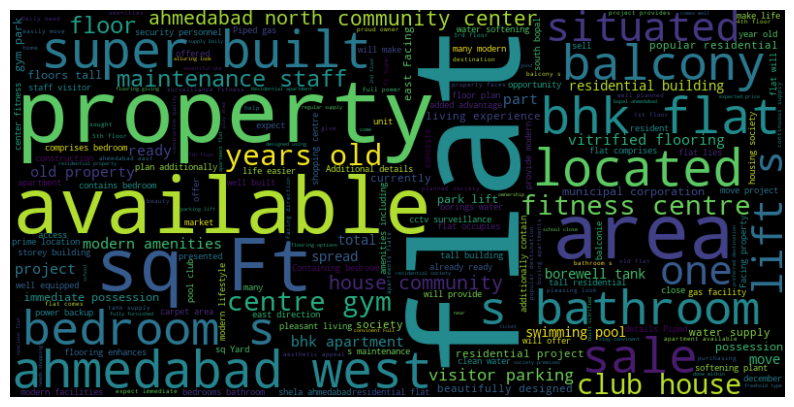

In [64]:
text = ' '.join(df['DESCRIPTION'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### `2. CITY`

In [65]:
df['CITY'].value_counts()

Ahmedabad West     3899
Ahmedabad North    2257
Ahmedabad East     1091
Gandhinagar         523
Ahmedabad South      60
Name: CITY, dtype: int64

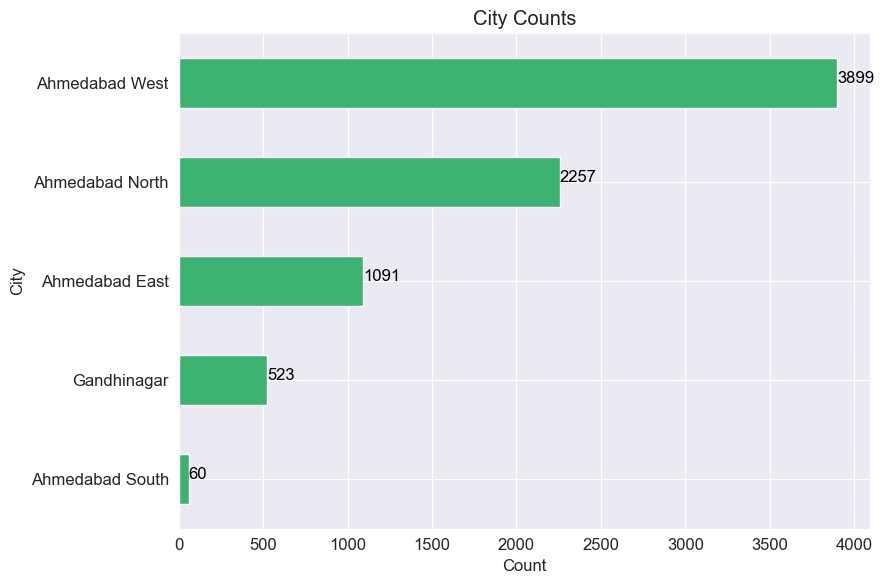

In [66]:
city_counts = df['CITY'].value_counts(ascending=True)

bars = city_counts.plot(kind='barh', color='mediumseagreen')

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             fontsize=12, color='black')

plt.title('City Counts')
plt.xlabel('Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

### `3. LOCALITY`

In [67]:
df['LOCALITY'].nunique()

361

In [68]:
df['LOCALITY'].value_counts()[:10]

Shela                 776
Gota                  587
South bopal           518
Vaishnodevi circle    375
Jagatpur              307
Chandkheda            266
Science city          208
Shilaj                199
Gift city             169
Satellite             162
Name: LOCALITY, dtype: int64

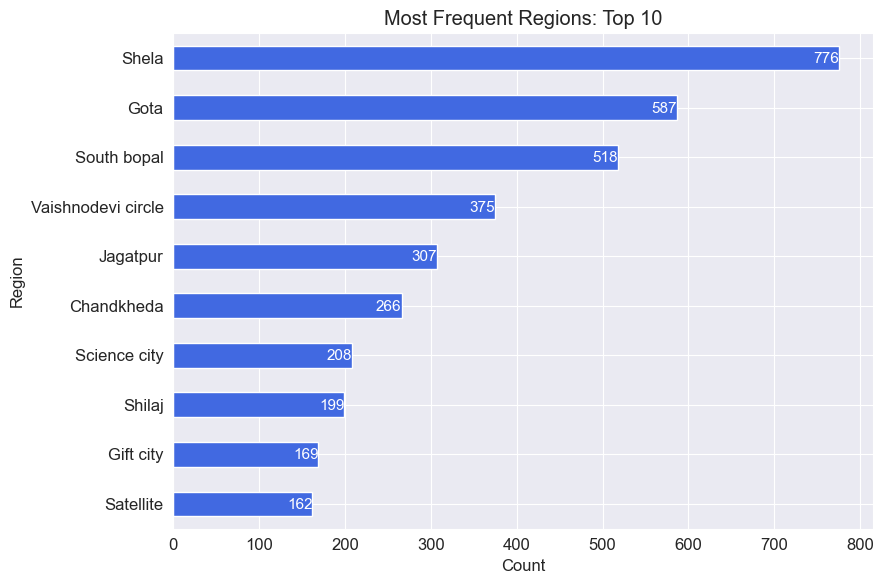

In [69]:
region_counts = df['LOCALITY'].value_counts(ascending=True)[-10:]

bars = region_counts.plot(kind='barh', color='royalblue')

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2 - 0.1, f'{int(bar.get_width())}', 
             ha='right', fontsize=11, color='white')

plt.title('Most Frequent Regions: Top 10')
plt.xlabel('Count')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

### `4. Num Of Bedrooms`

In [70]:
df['BEDROOM_NUM'].value_counts().sort_index()

1.0     515
2.0    2944
3.0    3530
4.0     841
Name: BEDROOM_NUM, dtype: int64

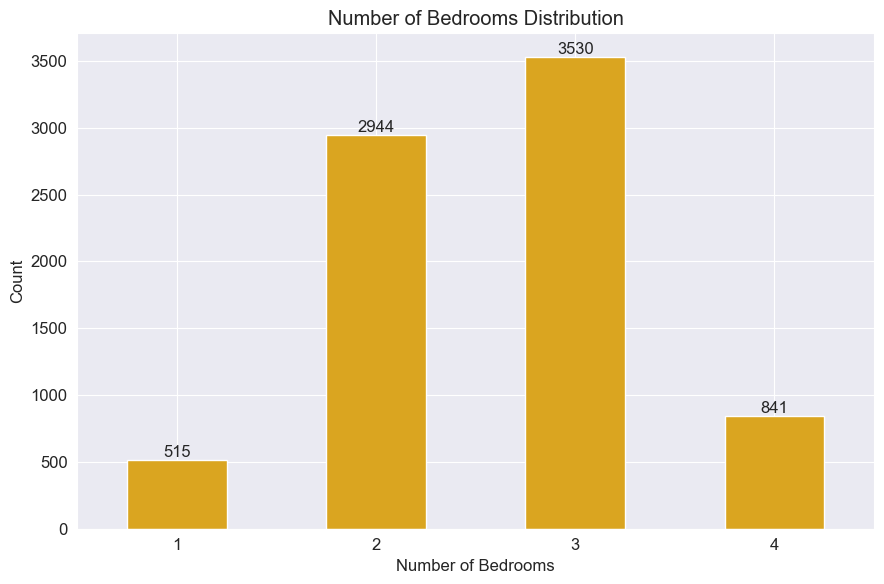

In [71]:
bedroom_counts = df['BEDROOM_NUM'].value_counts().sort_index()

bedroom_counts.index = bedroom_counts.index.astype(int)

bedroom_counts.plot(kind='bar', color='goldenrod')

plt.title('Number of Bedrooms Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

for index, value in enumerate(bedroom_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### `5. Num Of Bathrooms`

In [72]:
df['BATHROOM_NUM'].value_counts()

3.0    3268
2.0    3248
4.0     762
1.0     505
5.0      37
6.0      10
Name: BATHROOM_NUM, dtype: int64

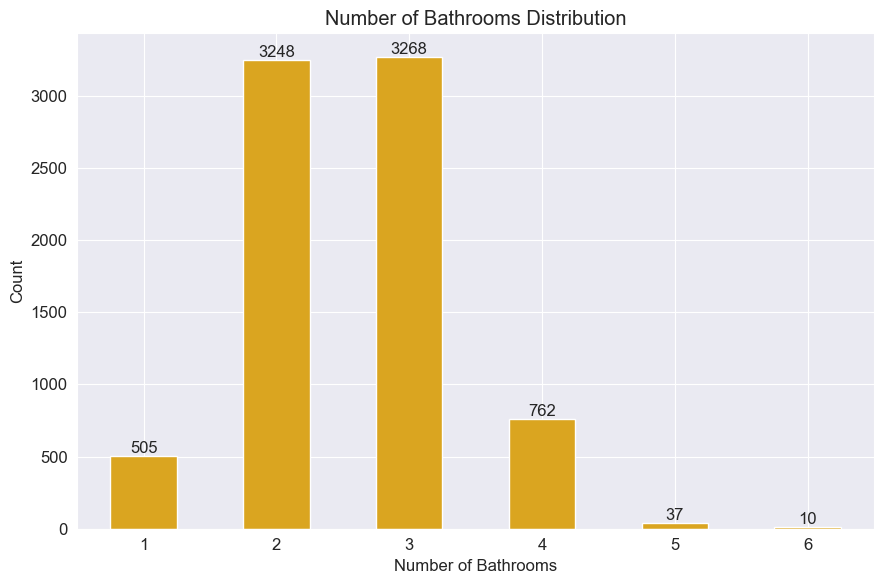

In [73]:
bathroom_counts = df['BATHROOM_NUM'].value_counts().sort_index()

bathroom_counts.index = bathroom_counts.index.astype(int)

bathroom_counts.plot(kind='bar', color='goldenrod')

plt.title('Number of Bathrooms Distribution')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

for index, value in enumerate(bathroom_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### `6. FLOOR_CATEGORY`

In [74]:
df['FLOOR_CATEGORY'].value_counts()

High Floors     3914
Low Floors      3750
Ground Floor     166
Name: FLOOR_CATEGORY, dtype: int64

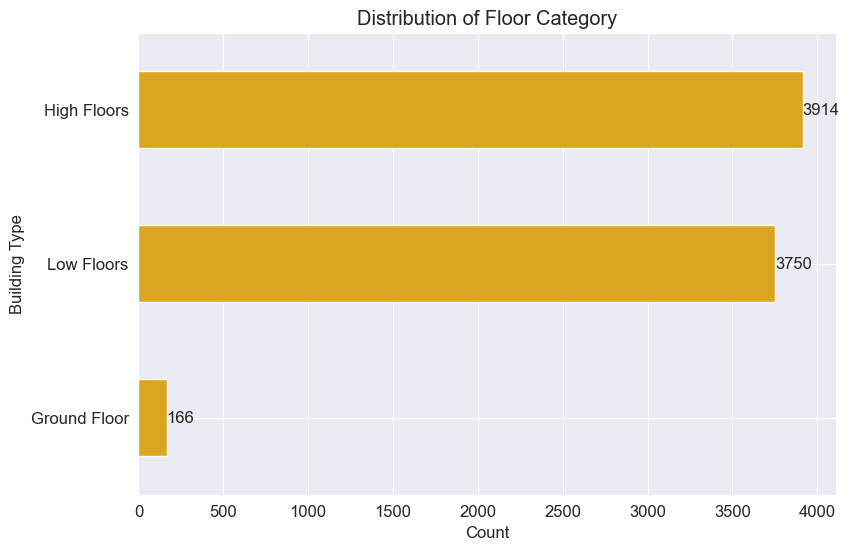

In [75]:
floor_cat_counts = df['FLOOR_CATEGORY'].value_counts(ascending=True)

floor_cat_counts.plot(kind='barh', color='goldenrod')

plt.title('Distribution of Floor Category')
plt.xlabel('Count')
plt.ylabel('Building Type')

for index, value in enumerate(floor_cat_counts):
    plt.text(value, index, str(value), ha='left', va='center')

plt.show()

### `7. BUILDING_TYPE`

In [76]:
df['BUILDING_TYPE'].value_counts()

Mid-rise buildings     5108
Low-rise buildings     1953
High-rise buildings     595
Skyscrapers             174
Name: BUILDING_TYPE, dtype: int64

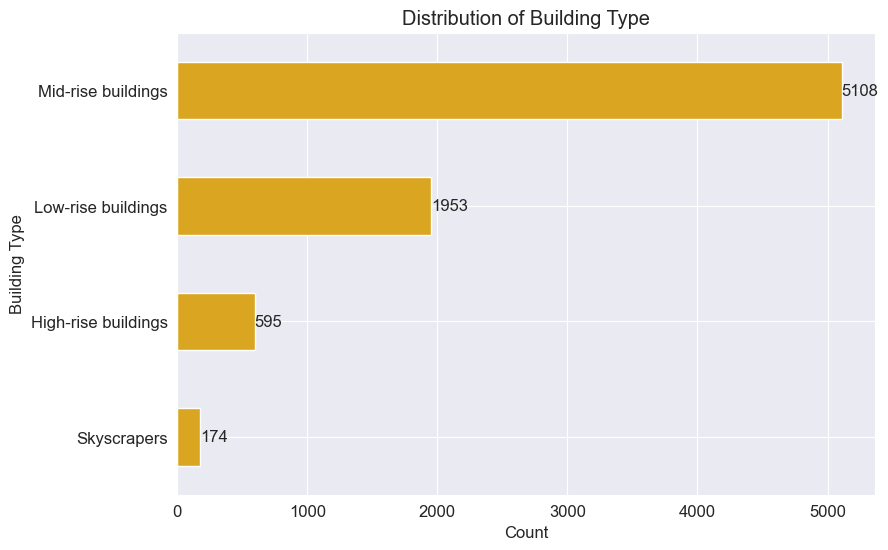

In [77]:
building_type_counts = df['BUILDING_TYPE'].value_counts(ascending=True)

building_type_counts.plot(kind='barh', color='goldenrod')

plt.title('Distribution of Building Type')
plt.xlabel('Count')
plt.ylabel('Building Type')

for index, value in enumerate(building_type_counts):
    plt.text(value, index, str(value), ha='left', va='center')

plt.show()

### `8. AREA`

In [78]:
df['AREA'].describe()

count    7830.000000
mean     1674.338123
std       732.943285
min       500.000000
25%      1170.000000
50%      1500.000000
75%      2025.000000
max      4000.000000
Name: AREA, dtype: float64

In [79]:
df['AREA'].skew()

1.041674854974616

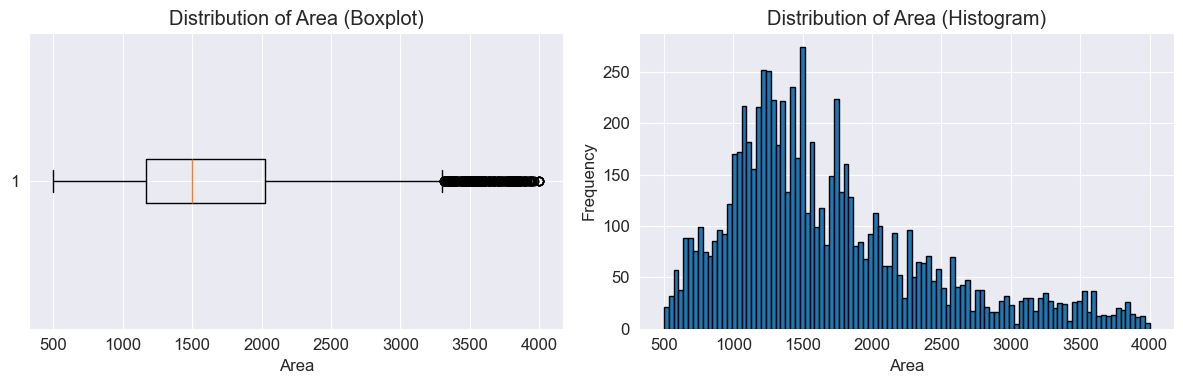

In [80]:
area_data = df['AREA']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.boxplot(area_data, vert=False)
plt.title('Distribution of Area (Boxplot)')
plt.xlabel('Area')
plt.ylabel('')

plt.subplot(1, 2, 2)
plt.hist(area_data, bins=100, edgecolor='black')
plt.title('Distribution of Area (Histogram)')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### `9. PRICE`

In [81]:
df['PRICE'].describe()

count    7.830000e+03
mean     8.869079e+06
std      5.740542e+06
min      1.000000e+06
25%      5.000000e+06
50%      7.000000e+06
75%      1.150000e+07
max      3.000000e+07
Name: PRICE, dtype: float64

In [82]:
df['PRICE'].skew()

1.4275431167422694

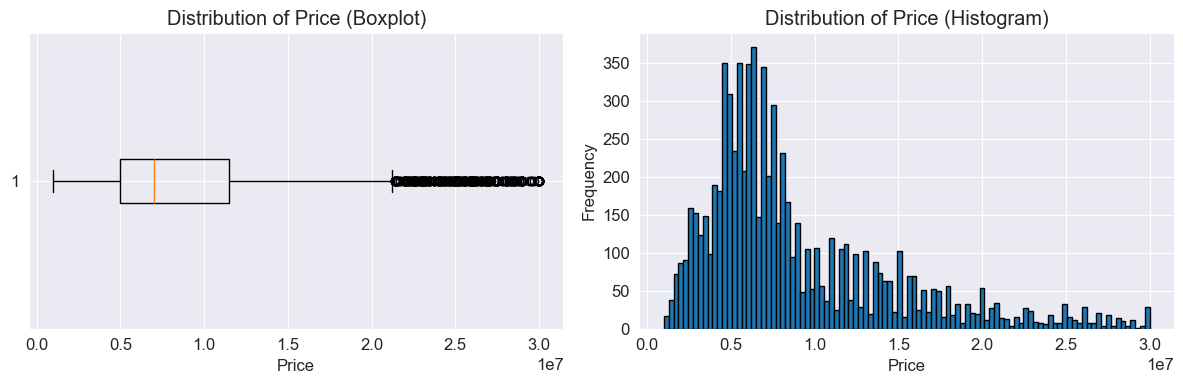

In [83]:
price_data = df['PRICE']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.boxplot(price_data, vert=False)
plt.title('Distribution of Price (Boxplot)')
plt.xlabel('Price')
plt.ylabel('')

plt.subplot(1, 2, 2)
plt.hist(price_data, bins=100, edgecolor='black')
plt.title('Distribution of Price (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### `10. Num Of Balcony`

In [84]:
df['BALCONY_NUM'].value_counts(ascending=True).index.astype(int)

Int64Index([4, 3, 0, 2, 1], dtype='int64')

In [85]:
df['BALCONY_NUM'].value_counts()

1.0    4852
2.0    1803
0.0     533
3.0     493
4.0     149
Name: BALCONY_NUM, dtype: int64

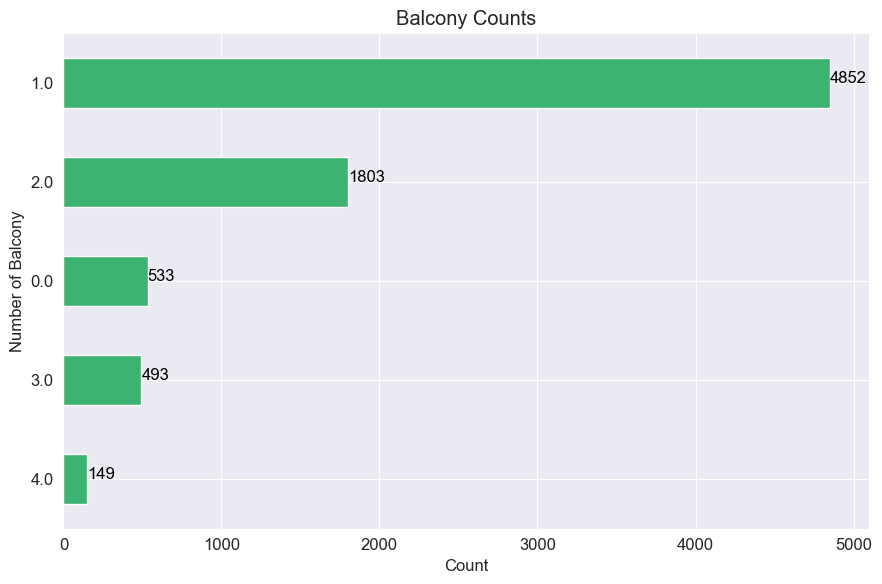

In [86]:
balcony_counts = df['BALCONY_NUM'].value_counts(ascending=True)

bars = balcony_counts.plot(kind='barh', color='mediumseagreen')

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             fontsize=12, color='black')

plt.title('Balcony Counts')
plt.xlabel('Count')
plt.ylabel('Number of Balcony')
plt.tight_layout()
plt.show()

### `11. TOP_USPS`

In [87]:
df['TOP_USPS'].str.replace(r'[\[\]"\']', '', regex=True).str.split(', ').explode().str.lower().nunique()

655

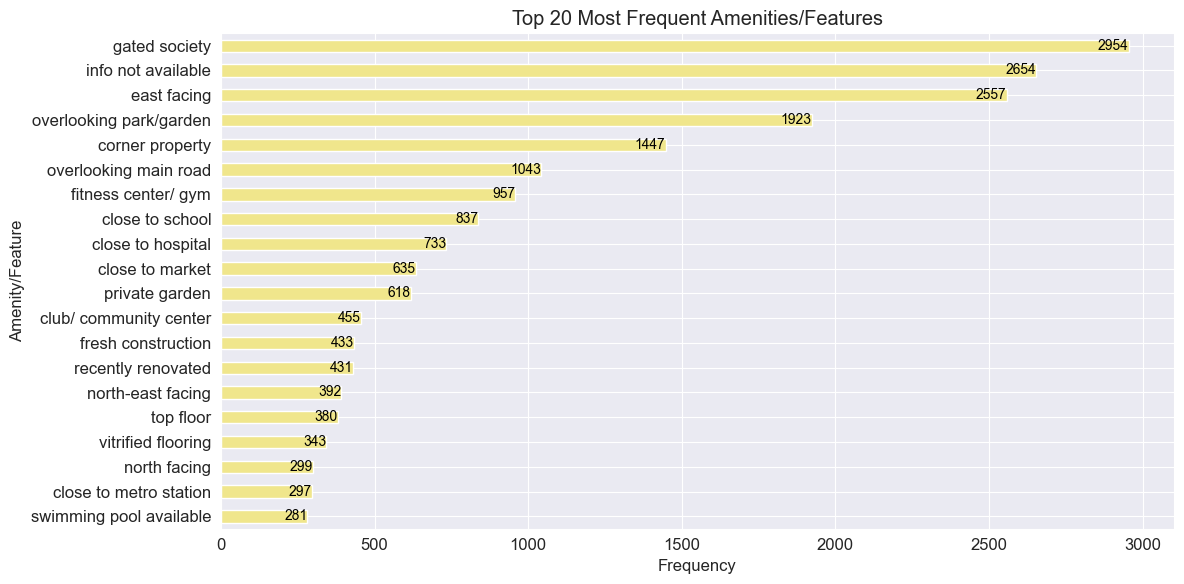

In [88]:
top_usps_cleaned = df['TOP_USPS'].str.replace(r'[\[\]"\']', '', regex=True).str.split(', ').explode().str.lower()

top_usps_top_20 = top_usps_cleaned.value_counts(ascending=True)[-20:]

plt.figure(figsize=(12, 6))
bars = top_usps_top_20.plot(kind='barh', color='khaki')

plt.title(f'Top 20 Most Frequent Amenities/Features')
plt.xlabel('Frequency')
plt.ylabel('Amenity/Feature')

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
             va='center', ha='right', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### `12. CORNER_PROPERTY`

In [89]:
df['CORNER_PROPERTY'].value_counts()

N    4912
Y    2918
Name: CORNER_PROPERTY, dtype: int64

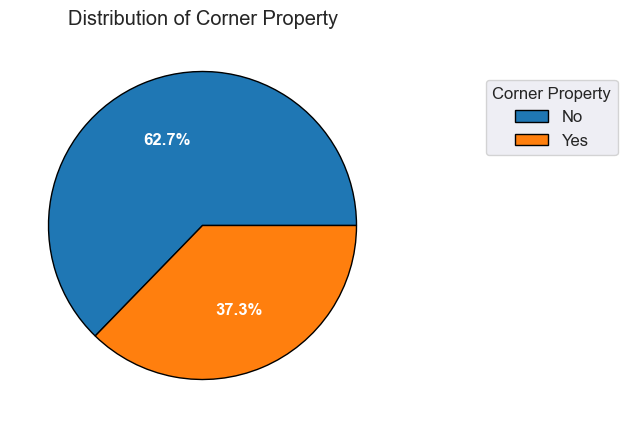

In [90]:
corner_property_counts = df['CORNER_PROPERTY'].value_counts()
labels = ['No', 'Yes']
sizes = corner_property_counts.values

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                  textprops=dict(color="w"))
for wedge in wedges:
    wedge.set_edgecolor('black')
    
ax.legend(wedges, labels,
          title="Corner Property",
          bbox_to_anchor=(1.1, -0.1, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.title("Distribution of Corner Property")
plt.show()

### `13. FURNISH_LABEL`

In [91]:
(df['FURNISH_LABEL'].value_counts(normalize=True))*100

Unfurnished      50.038314
Semifurnished    28.518519
Furnished        21.443167
Name: FURNISH_LABEL, dtype: float64

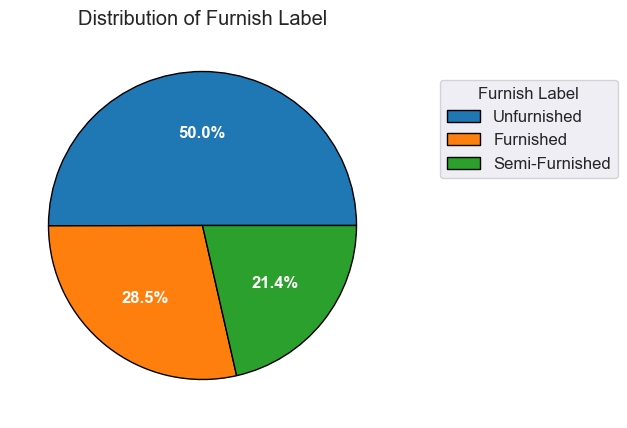

In [92]:
furnish_label_counts = df['FURNISH_LABEL'].value_counts()
labels = ['Unfurnished', 'Furnished', 'Semi-Furnished']
sizes = furnish_label_counts.values

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                  textprops=dict(color="w"))
for wedge in wedges:
    wedge.set_edgecolor('black')
    
ax.legend(wedges, labels,
          title="Furnish Label",
          bbox_to_anchor=(1.1, -0.1, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.title("Distribution of Furnish Label")
plt.show()

## Bivariate analysis

### `1. City vs Locality`

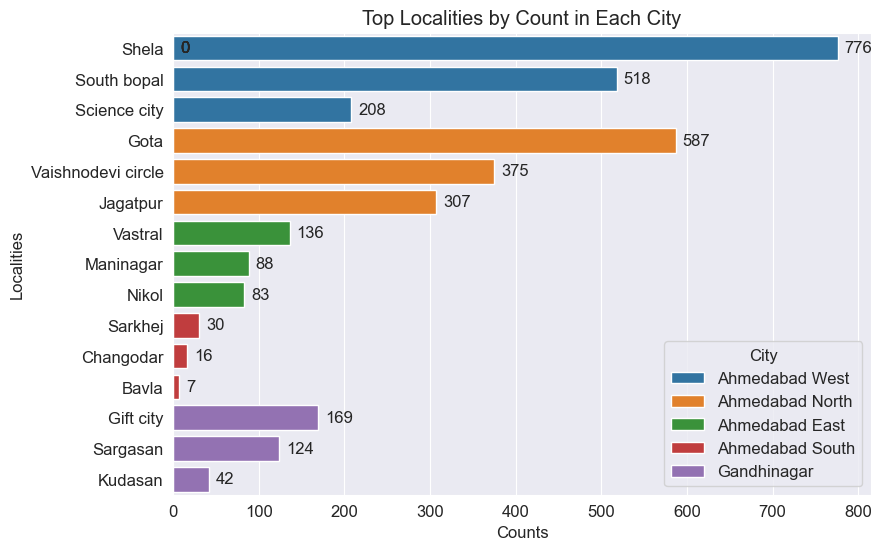

In [93]:
locality_counts = df.groupby('CITY')['LOCALITY'].value_counts()
locality_counts_df = locality_counts.reset_index(name='counts')
locality_counts_df = locality_counts_df.sort_values(['CITY', 'counts'], ascending=[True, False])
temp_df = locality_counts_df.groupby('CITY').head(3)
custom_order = {
    'Ahmedabad West': 1, 
    'Ahmedabad North': 2, 
    'Ahmedabad East': 3, 
    'Ahmedabad South': 4, 
    'Gandhinagar': 5
}
temp_df = temp_df.copy()
temp_df.loc[:,'Order'] = temp_df['CITY'].map(custom_order)

temp_df = temp_df.sort_values(by=['Order', 'counts'], ascending=[True, False])
temp_df.drop('Order', axis=1, inplace=True)
city_order = ['Ahmedabad West', 'Ahmedabad North', 'Ahmedabad East', 'Ahmedabad South', 'Gandhinagar']
temp_df.loc[:,'CITY'] = pd.Categorical(temp_df['CITY'], categories=city_order, ordered=True)

barplot = sns.barplot(data=temp_df, x='counts', y='LOCALITY', hue='CITY', dodge=False)

plt.title('Top Localities by Count in Each City')
plt.xlabel('Counts')
plt.ylabel('Localities')
plt.legend(title='City', loc='lower right')

for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha = 'left',  
                     va = 'center',  
                     xytext = (5, 0),  
                     textcoords = 'offset points')

plt.show()

### `2. Number of Bedrooms vs Number of Bathrooms`

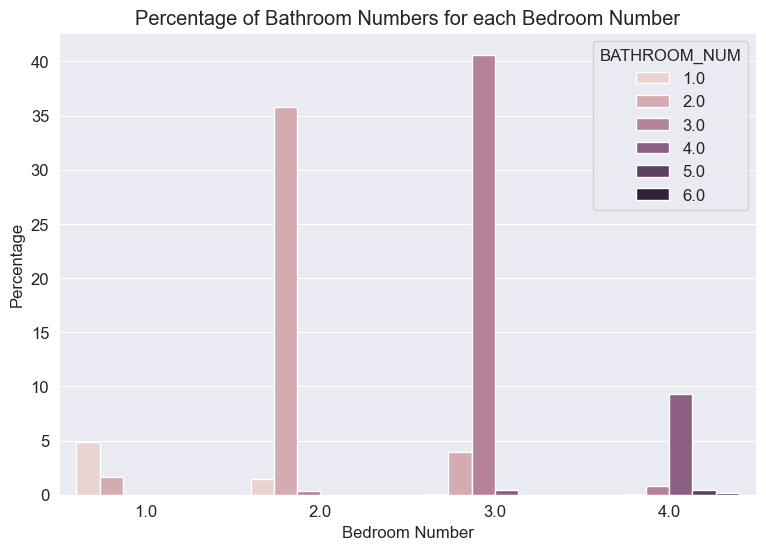

In [94]:
sns.countplot(data=df, x='BEDROOM_NUM', stat='percent', hue='BATHROOM_NUM')

plt.title('Percentage of Bathroom Numbers for each Bedroom Number')
plt.xlabel('Bedroom Number')
plt.ylabel('Percentage')
plt.show()

### `3. Number of Bedrooms vs Number of Balcony`

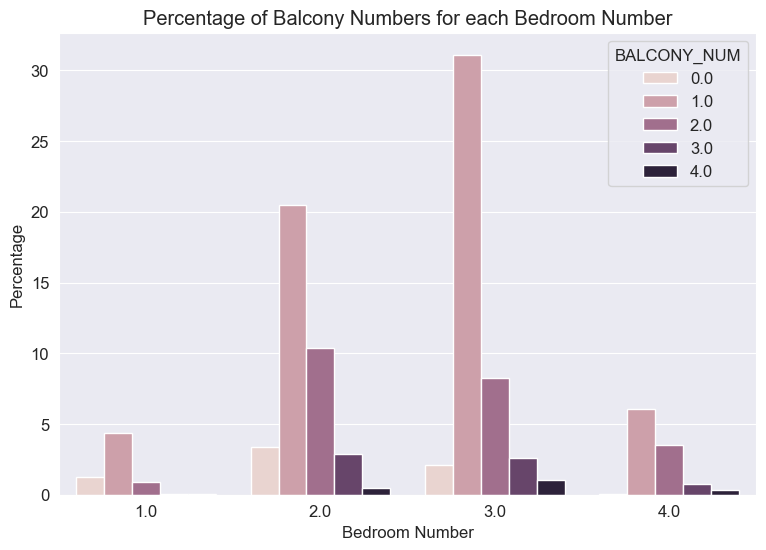

In [95]:
sns.countplot(data=df, x='BEDROOM_NUM', stat='percent', hue='BALCONY_NUM')

plt.title('Percentage of Balcony Numbers for each Bedroom Number')
plt.xlabel('Bedroom Number')
plt.ylabel('Percentage')
plt.show()

### `4. Building Type vs Floor Category`

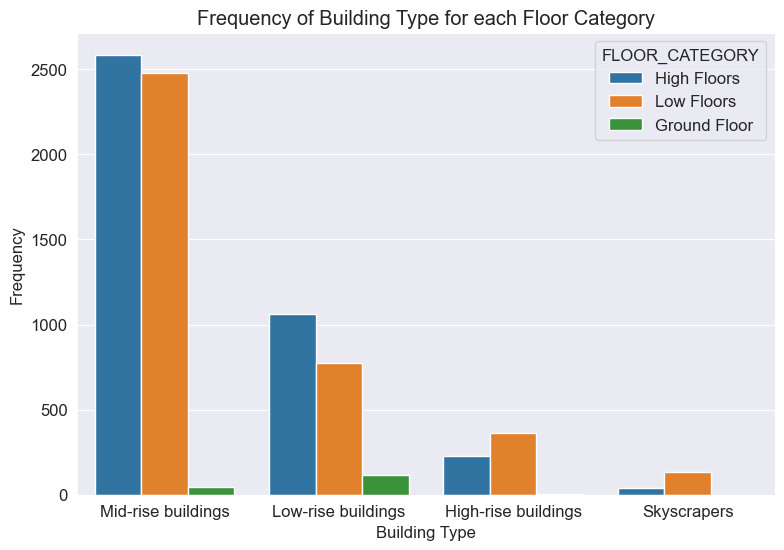

In [96]:
sns.countplot(data=df, x='BUILDING_TYPE', hue='FLOOR_CATEGORY', orient='v')

plt.title('Frequency of Building Type for each Floor Category')
plt.xlabel('Building Type')
plt.ylabel('Frequency')
plt.show()

### `5. City vs. Price`

In [97]:
df.groupby('CITY')['PRICE'].describe()

count          mean           std        min        25%  \
CITY                                                                        
Ahmedabad East   1091.0  4.393963e+06  2.977811e+06  1000000.0  2560500.0   
Ahmedabad North  2257.0  8.104661e+06  4.368924e+06  1200000.0  5200000.0   
Ahmedabad South    60.0  3.644467e+06  2.570701e+06  1000000.0  1800000.0   
Ahmedabad West   3899.0  1.048349e+07  6.274861e+06  1300000.0  6000000.0   
Gandhinagar       523.0  1.006703e+07  5.480911e+06  1500000.0  5700000.0   

                       50%         75%         max  
CITY                                                
Ahmedabad East   3700000.0   5100000.0  30000000.0  
Ahmedabad North  6800000.0   9800000.0  30000000.0  
Ahmedabad South  2650000.0   4553500.0  12500000.0  
Ahmedabad West   7999000.0  14000000.0  30000000.0  
Gandhinagar      8880000.0  13500000.0  30000000.0

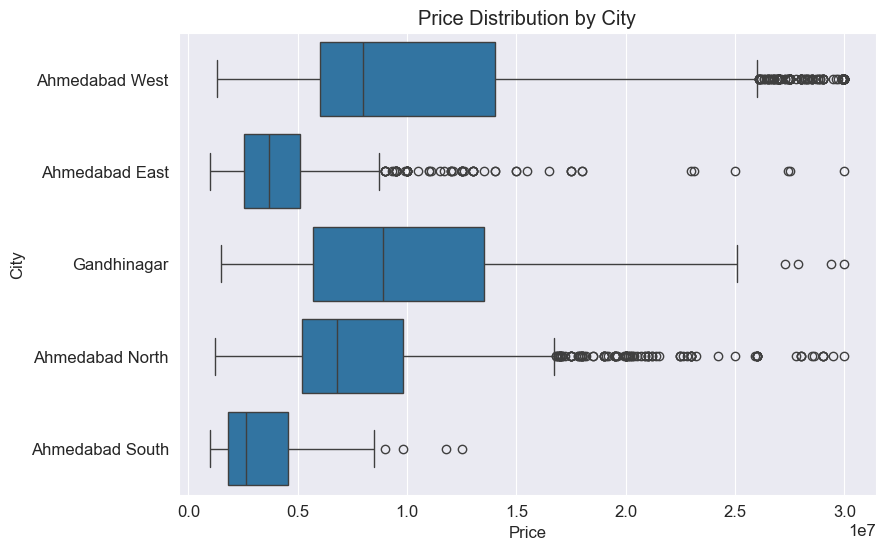

In [98]:
sns.boxplot(data=df, y='CITY', x='PRICE', orient='h')
plt.title('Price Distribution by City')
plt.xlabel('Price')
plt.ylabel('City')
plt.show()

### `6. Number of Bedrooms vs. Price`

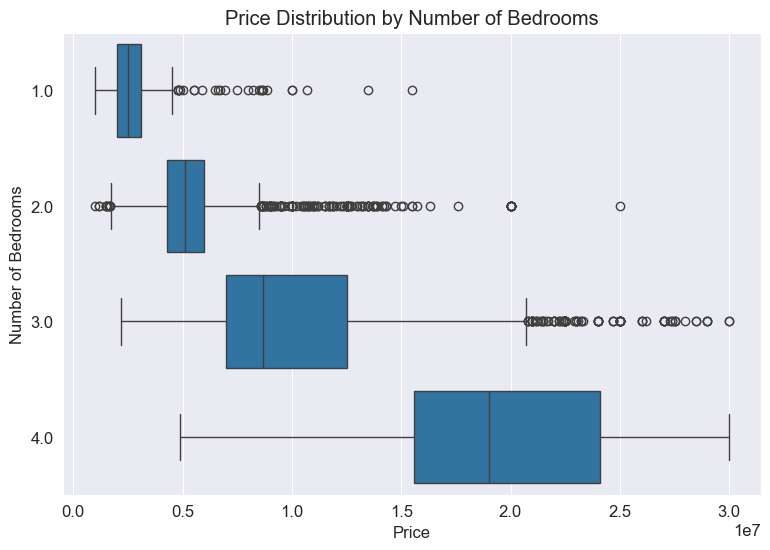

In [99]:
sns.boxplot(data=df, y='BEDROOM_NUM', x='PRICE', orient='h')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')
plt.show()

### `7. Number of Bathrooms vs. Price`

In [100]:
df['BATHROOM_NUM'].value_counts()

3.0    3268
2.0    3248
4.0     762
1.0     505
5.0      37
6.0      10
Name: BATHROOM_NUM, dtype: int64

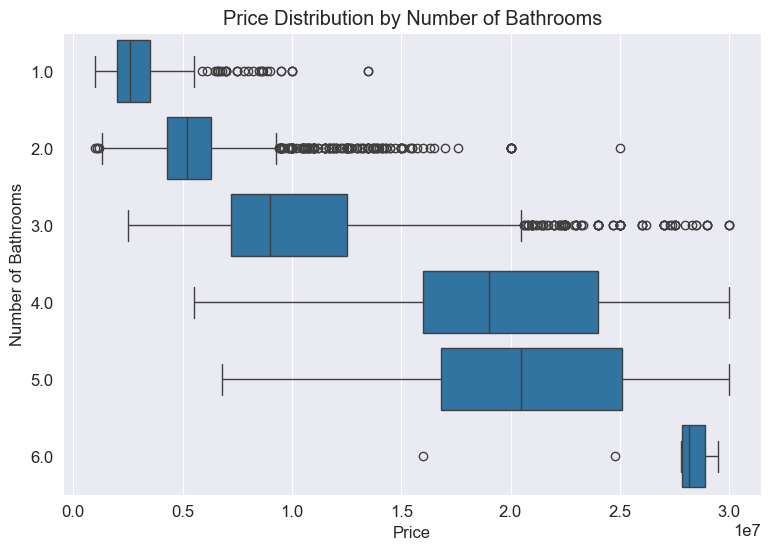

In [101]:
sns.boxplot(data=df, y='BATHROOM_NUM', x='PRICE', orient='h')
plt.title('Price Distribution by Number of Bathrooms')
plt.xlabel('Price')
plt.ylabel('Number of Bathrooms')
plt.show()

### `8. Furnishing Status vs. Price`

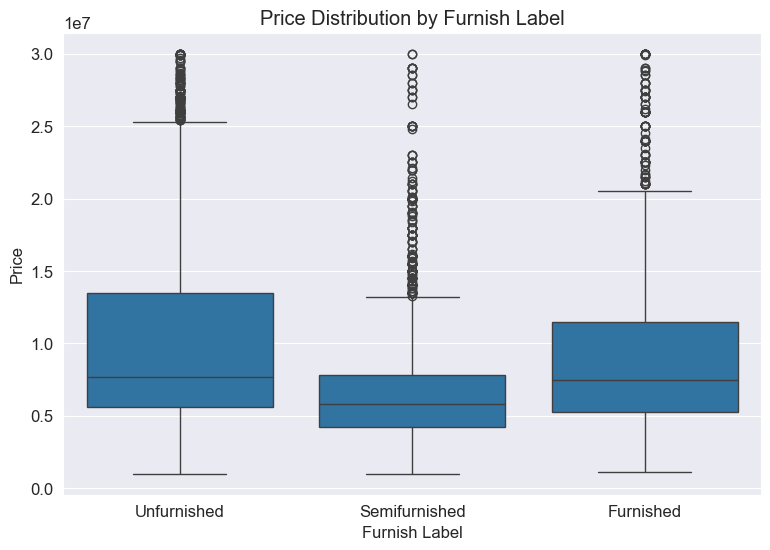

In [102]:
sns.boxplot(data=df, x='FURNISH_LABEL', y='PRICE')
plt.title('Price Distribution by Furnish Label')
plt.ylabel('Price')
plt.xlabel('Furnish Label')
plt.show()

### `9. Building Type vs. Price`

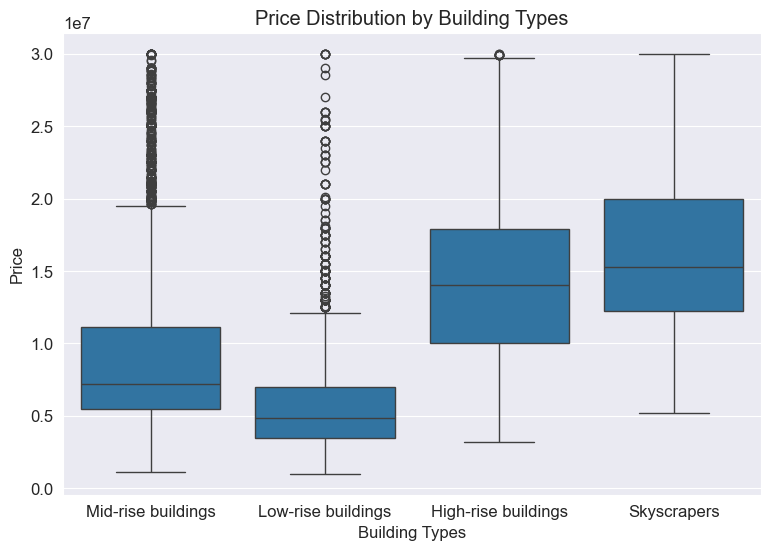

In [103]:
sns.boxplot(data=df, x='BUILDING_TYPE', y='PRICE')
plt.title('Price Distribution by Building Types')
plt.ylabel('Price')
plt.xlabel('Building Types')
plt.show()

### `10. Area of the Property vs. Price`

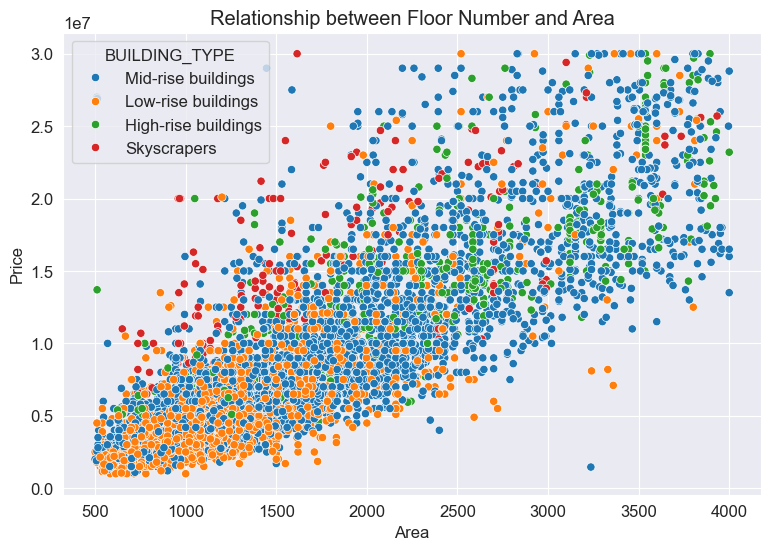

In [104]:
sns.scatterplot(data=df, x='AREA', y='PRICE',  hue="BUILDING_TYPE")
plt.title('Relationship between Floor Number and Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### `11. Area of the Property vs. Price`

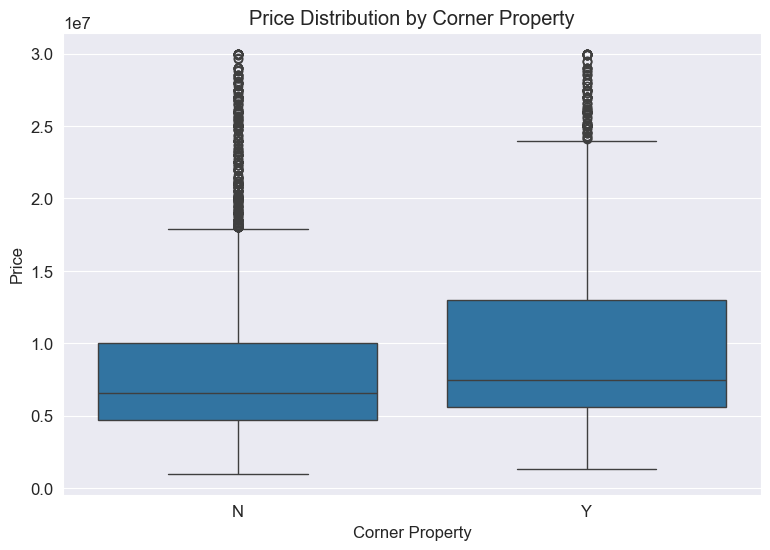

In [105]:
sns.boxplot(data=df, x='CORNER_PROPERTY', y='PRICE')
plt.title('Price Distribution by Corner Property')
plt.ylabel('Price')
plt.xlabel('Corner Property')
plt.show()

### `12. Locality vs. Price`

In [106]:
df['LOCALITY'].str.lower().nunique()

361

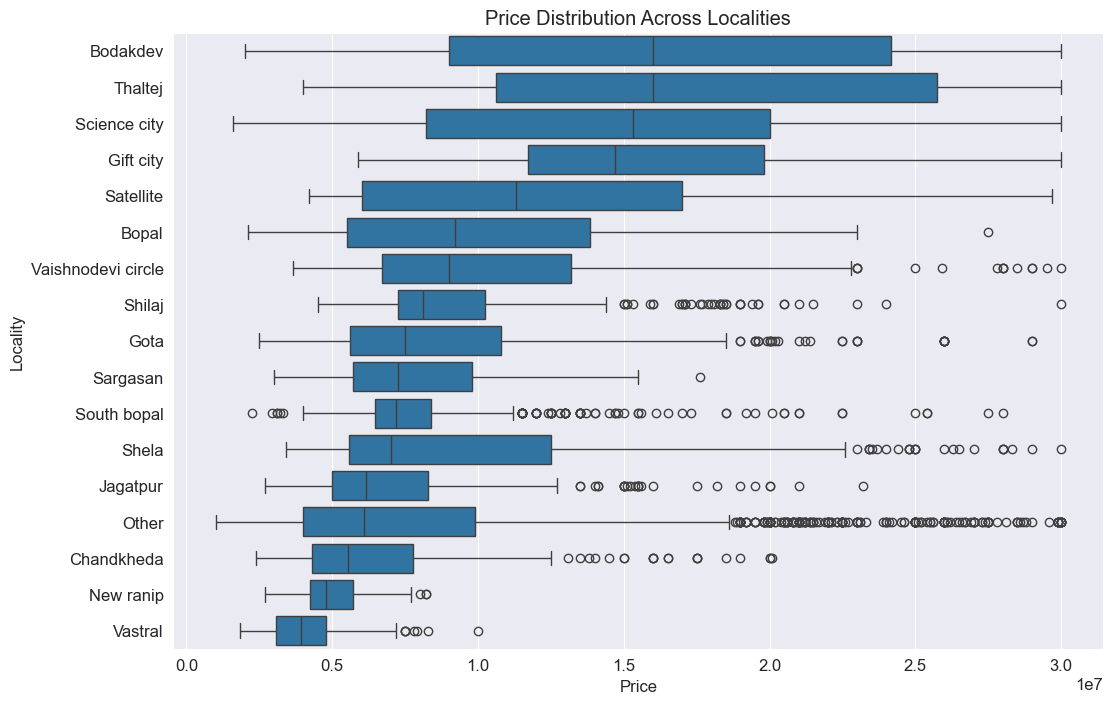

In [107]:
temp_df = df[['LOCALITY', 'PRICE']].copy()
locality_counts = temp_df['LOCALITY'].value_counts()
threshold = 100
localities_to_replace = locality_counts[locality_counts < threshold].index
temp_df.loc[temp_df['LOCALITY'].isin(localities_to_replace), 'LOCALITY'] = 'Other'
warnings.filterwarnings("ignore", message="The default of observed")
median_prices = temp_df.groupby('LOCALITY', observed=False)['PRICE'].median().sort_values(ascending=False)

temp_df['LOCALITY'] = temp_df['LOCALITY'].astype("category")
temp_df['LOCALITY'] = temp_df['LOCALITY'].cat.set_categories(median_prices.index)

plt.figure(figsize=(12, 8))
sns.boxplot(data=temp_df, x='PRICE', y='LOCALITY', orient='h', order=median_prices.index)
plt.title('Price Distribution Across Localities')
plt.xlabel('Price')
plt.ylabel('Locality')
plt.show()

<h2><center>Model Building</center></h2>

In [108]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [109]:
input_cols = ['CITY', 'BUILDING_TYPE', 'FURNISH_LABEL', 'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'AREA']
target_cols = ['PRICE']

X = df[input_cols]
y = df[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

preprocessing = ColumnTransformer([
    ('oe', OrdinalEncoder(), [0, 1, 2])
], remainder='passthrough')

pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model', GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=5,
                                         max_features='sqrt', min_samples_leaf=5, min_samples_split=20, random_state=1))
])

pipeline.fit(X_train, y_train.values.ravel())

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print('Train RMSE: ', root_mean_squared_error(y_train, y_train_pred))  
print('Test RMSE: ', root_mean_squared_error(y_test, y_test_pred))

print('Train R2: ', r2_score(y_train, y_train_pred))
print('Test R2: ', r2_score(y_test, y_test_pred))

X_train shape: (6264, 7)
X_test shape: (1566, 7)
Train RMSE:  2400177.7363501997
Test RMSE:  2442097.8777877972
Train R2:  0.8270959782626244
Test R2:  0.8105137971451514


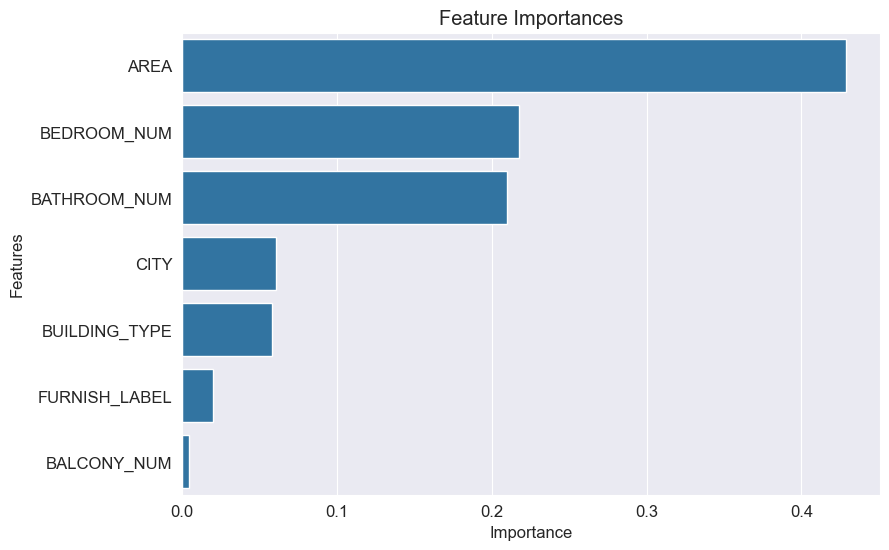

In [110]:
feature_importances = pipeline.named_steps['model'].feature_importances_
feature_names = X_train.columns
feature_importances_df = pd.DataFrame({'Feature Importance': feature_importances}, index=feature_names).sort_values('Feature Importance', ascending=False)
feature_importances_df = feature_importances_df.reset_index()
feature_importances_df.columns = ['Feature', 'Feature Importance']
sns.barplot(x='Feature Importance', y='Feature', data=feature_importances_df.sort_values('Feature Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [112]:
import pickle

In [113]:
with open('model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [117]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    print(loaded_model.predict(np.array(['Ahmedabad East', 'Mid-rise buildings', 'Semifurnished', 2.0, 2.0, 3.0, 882.0]).reshape(1,-1))[0])

4304438.711627155


C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [136]:
df[input_cols+target_cols].sample(1)

CITY       BUILDING_TYPE FURNISH_LABEL  BEDROOM_NUM  \
4161  Ahmedabad North  Mid-rise buildings   Unfurnished          3.0   

      BATHROOM_NUM  BALCONY_NUM    AREA       PRICE  
4161           3.0          1.0  2565.0  11000000.0

In [140]:
import plotly.graph_objs as go

def generate_city_counts(df):
    city_counts = df['CITY'].value_counts(ascending=True)
    data = [go.Bar(y=city_counts.index, x=city_counts.values, orientation='h', marker=dict(color='mediumseagreen'))]
    layout = go.Layout(title='City Counts', xaxis=dict(title='Count'), yaxis=dict(title='City'))
    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [141]:
generate_city_counts(df)

In [143]:
import plotly.express as px
import plotly.graph_objs as go

In [144]:
# Box plot
fig_box = px.box(df, y='AREA', orientation='h', title='Distribution of Area (Boxplot)', width=500, height=400)

# Histogram
fig_hist = px.histogram(df, x='AREA', nbins=20, title='Distribution of Area (Histogram)', width=500, height=400)

# Display the plots side by side
fig_box.show()
fig_hist.show()

In [ ]:
# import sklearn
# print(sklearn.__version__)
# pip install scikit-learn==1.4.2